In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
dataPorto = pd.read_csv('PortoPortugal_50_sin_nulos.csv')
dataMéxico = pd.read_csv('México.csv')

In [3]:
print(dataPorto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14432 entries, 0 to 14431
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    14432 non-null  int64  
 1   id                                            14432 non-null  float64
 2   scrape_id                                     14432 non-null  float64
 3   last_scraped                                  14432 non-null  object 
 4   source                                        14432 non-null  object 
 5   host_id                                       14432 non-null  int64  
 6   host_since                                    14432 non-null  object 
 7   host_response_time                            11971 non-null  object 
 8   host_response_rate                            11971 non-null  object 
 9   host_acceptance_rate                          12736 non-null 

In [4]:
print(dataMéxico.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26281 non-null  int64  
 1   name                            26281 non-null  object 
 2   host_id                         26281 non-null  int64  
 3   host_name                       26278 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26281 non-null  object 
 6   latitude                        26281 non-null  float64
 7   longitude                       26281 non-null  float64
 8   room_type                       26281 non-null  object 
 9   price                           22466 non-null  float64
 10  minimum_nights                  26281 non-null  int64  
 11  number_of_reviews               26281 non-null  int64  
 12  last_review                     

In [5]:
# Columnas cuantitativas Porto

numeric_columns_porto = dataPorto.select_dtypes(include=['float64', 'int64']).columns
cuantitativas_porto = dataPorto[numeric_columns_porto]

In [6]:
# Columnas cuantitativas en México

numeric_columns_mexico = dataMéxico.select_dtypes(include=['float64', 'int64']).columns
cuantitativas_mexico = dataMéxico[numeric_columns_mexico]

In [7]:
# Método de Desviación Estándar para eliminar outliers

def eliminar_outliers_std(df):
    mean = df.mean()
    std = df.std()
    df_filtrado = df[(df > (mean - 2 * std)) & (df < (mean + 2 * std))]
    return df_filtrado

# Aplicar el método a ambos datasets
cuantitativas_porto_std = eliminar_outliers_std(cuantitativas_porto)
cuantitativas_mexico_std = eliminar_outliers_std(cuantitativas_mexico)

In [8]:
def eliminar_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_filtrado = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_filtrado

# Aplicación del método a ambos datasets
cuantitativas_porto_iqr = eliminar_outliers_iqr(cuantitativas_porto)
cuantitativas_mexico_iqr = eliminar_outliers_iqr(cuantitativas_mexico)

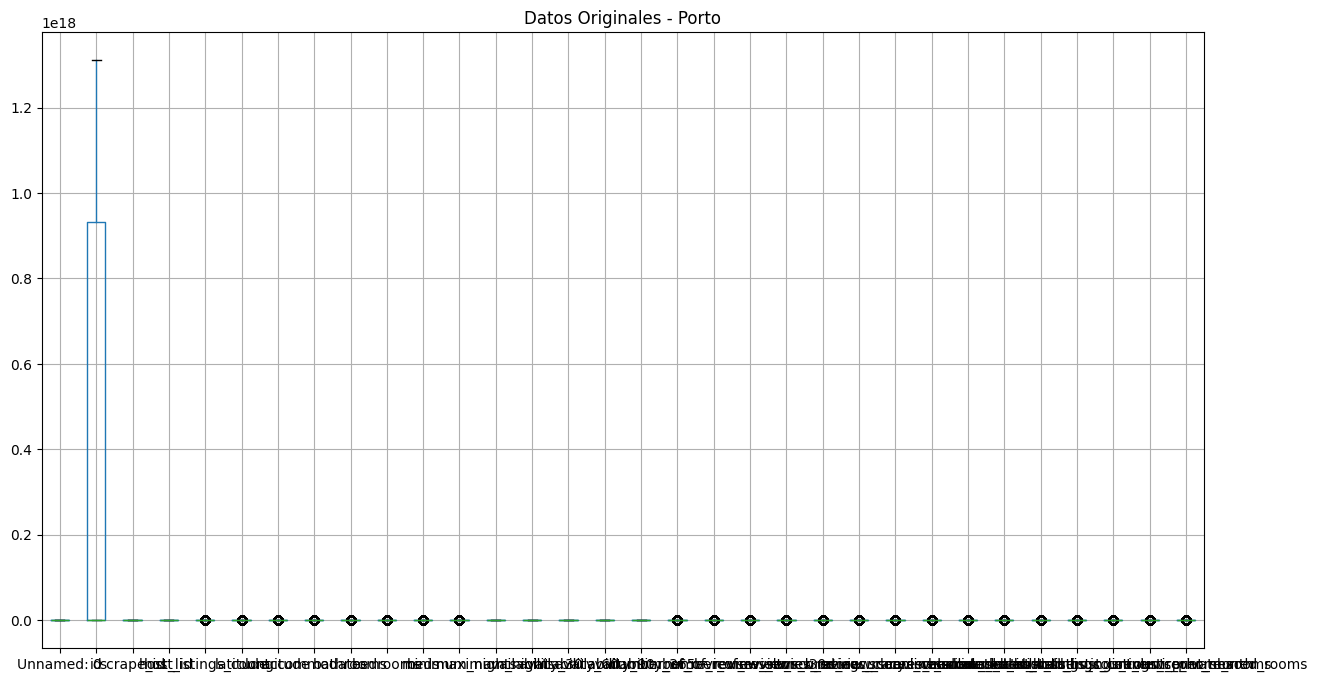

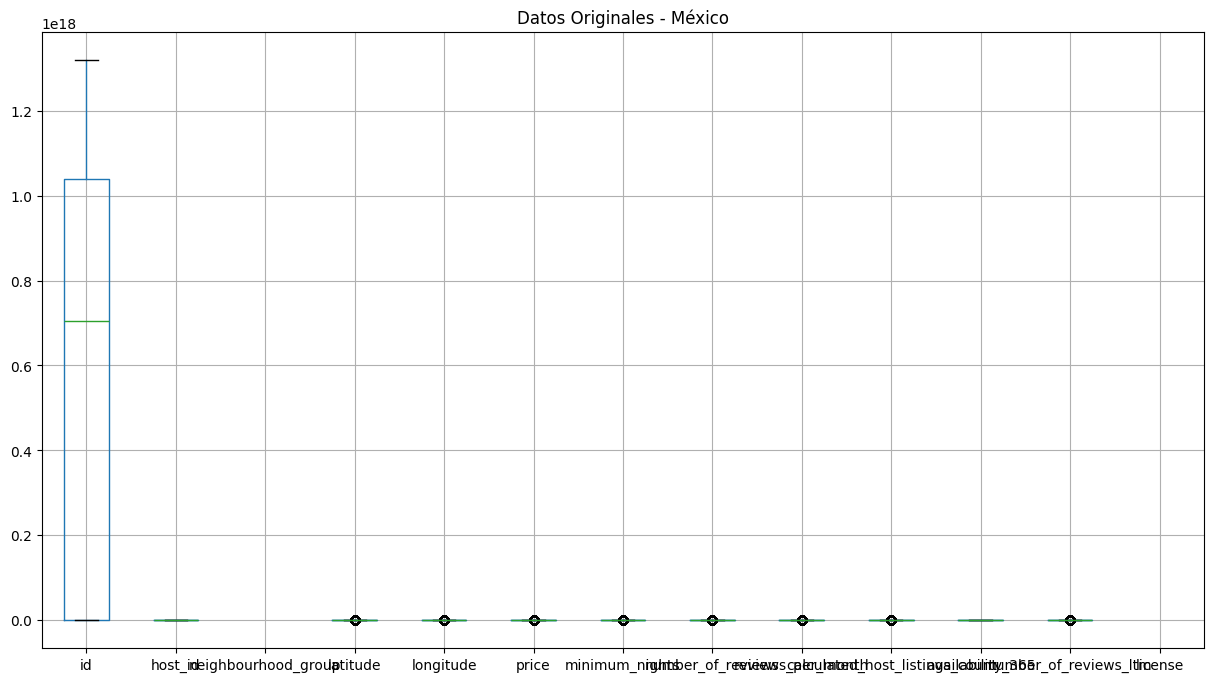

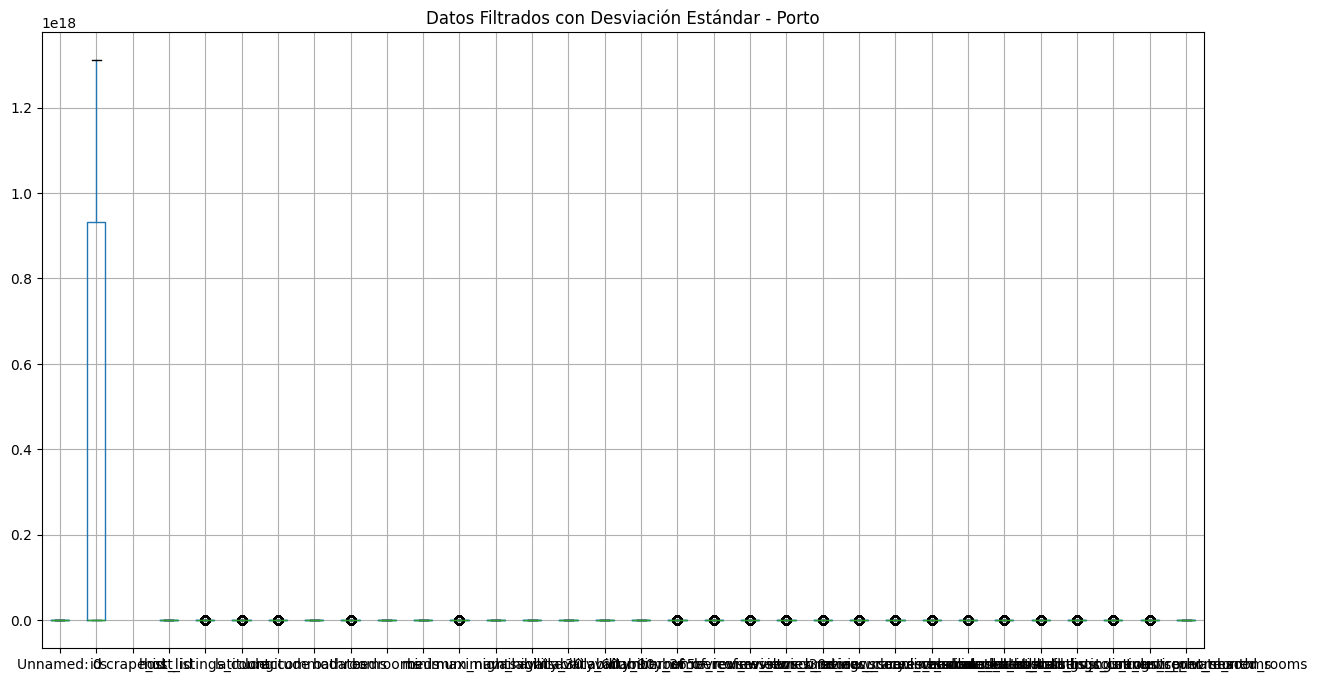

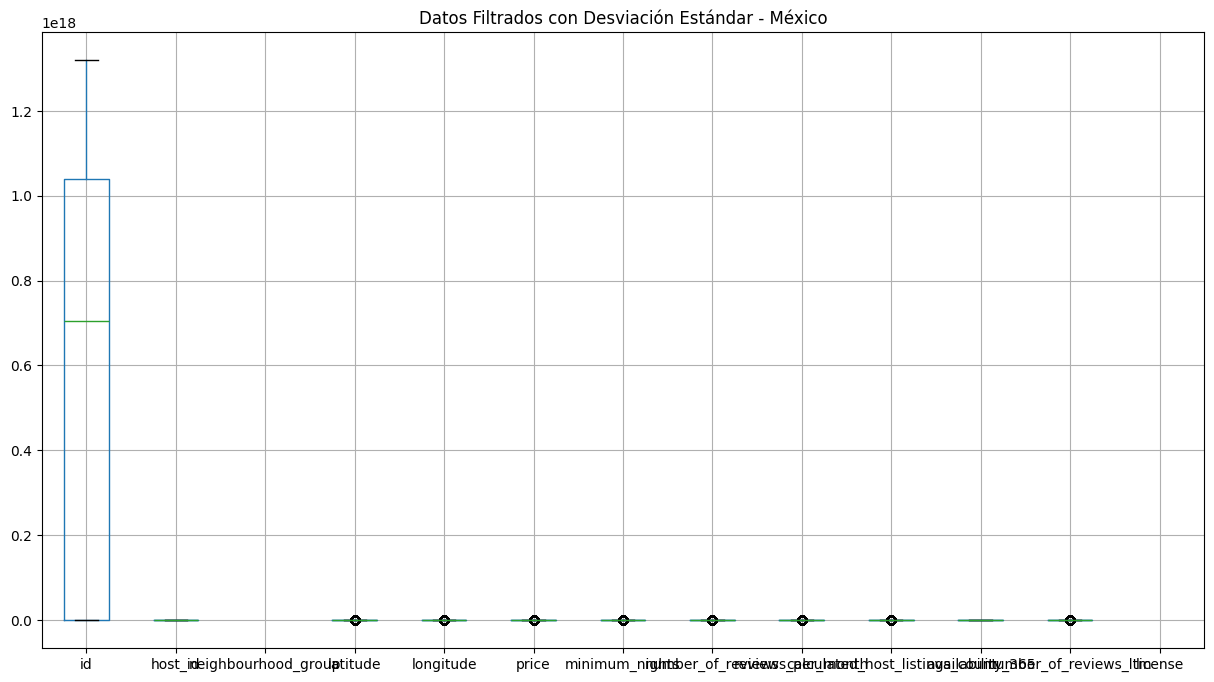

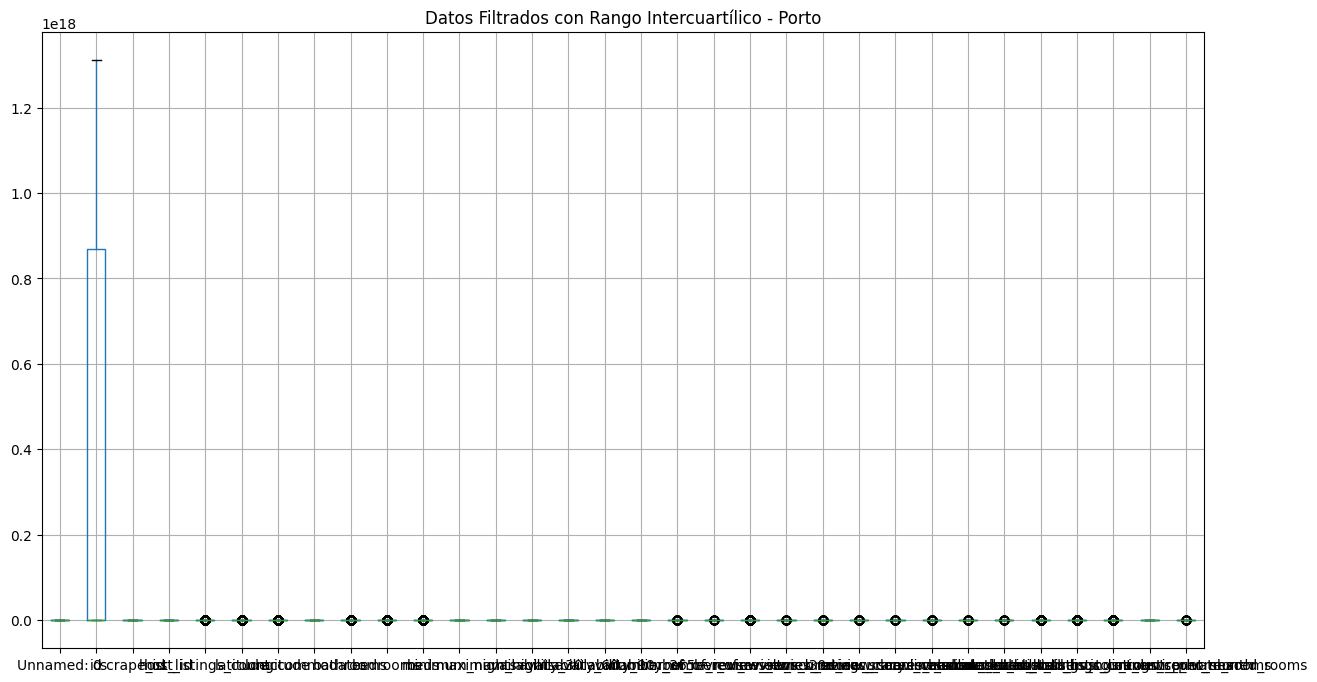

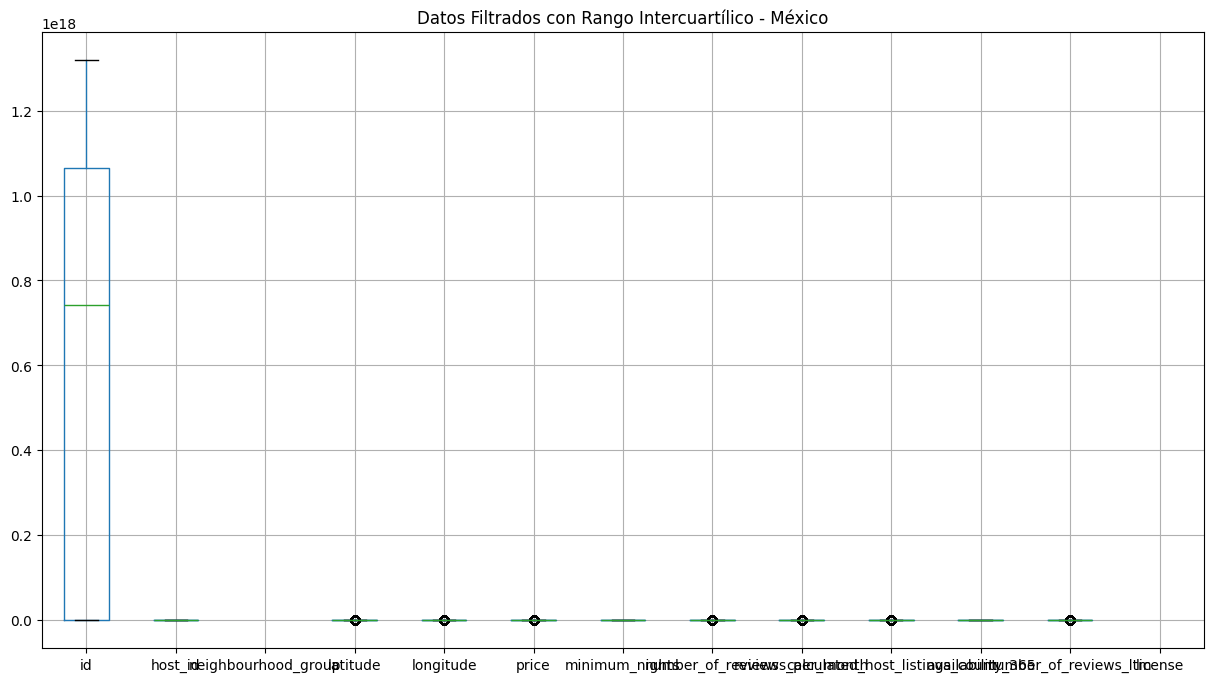

In [9]:
def graficar_boxplot(df, title):
    plt.figure(figsize=(15, 8))
    df.boxplot()
    plt.title(title)
    plt.show()

# Graficar diagramas de caja para los datos originales
graficar_boxplot(cuantitativas_porto, "Datos Originales - Porto")
graficar_boxplot(cuantitativas_mexico, "Datos Originales - México")

# Graficar diagramas de caja para los datos filtrados con Desviación Estándar
graficar_boxplot(cuantitativas_porto_std, "Datos Filtrados con Desviación Estándar - Porto")
graficar_boxplot(cuantitativas_mexico_std, "Datos Filtrados con Desviación Estándar - México")

# Graficar diagramas de caja para los datos filtrados con Rango Intercuartílico
graficar_boxplot(cuantitativas_porto_iqr, "Datos Filtrados con Rango Intercuartílico - Porto")
graficar_boxplot(cuantitativas_mexico_iqr, "Datos Filtrados con Rango Intercuartílico - México")

In [10]:
# Guardar los datos limpios en archivos CSV

cuantitativas_porto_std.to_csv("Datos_Limpios_Porto_Std.csv")
cuantitativas_mexico_std.to_csv("Datos_Limpios_México_Std.csv")

cuantitativas_porto_iqr.to_csv("Datos_Limpios_Porto_IQR.csv")
cuantitativas_mexico_iqr.to_csv("Datos_Limpios_México_IQR.csv")